In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip 'drive/MyDrive/kubig_ML/235713_신용카드 사용자 연체 예측 AI 경진대회_data.zip'

Archive:  drive/MyDrive/kubig_ML/235713_신용카드 사용자 연체 예측 AI 경진대회_data.zip
   creating: open/
  inflating: open/train.csv          
  inflating: open/sample_submission.csv  
  inflating: open/test.csv           


# 변수

* gender: 성별
* car: 차량 소유 여부
* reality: 부동산 소유 여부
* child_num: 자녀 수
* income_total: 연간 소득
* income_type: 소득 분류(노동자/공무원/연금수령자/학생)
							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

edu_type: 교육 수준( 고등-대학 전/고등/
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

family_type: 결혼 여부(결혼/사실혼
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

house_type: 생활 방식
							['Municipal apartment', 'House / apartment', 'With parents',

							 'Co-op apartment', 'Rented apartment', 'Office apartment']

DAYS_BIRTH: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

DAYS_EMPLOYED: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

							양수 값은 고용되지 않은 상태를 의미함

FLAG_MOBIL: 핸드폰 소유 여부
work_phone: 업무용 전화 소유 여부
phone: 전화 소유 여부
email: 이메일 소유 여부
occyp_type: 직업 유형													
family_size: 가족 규모
begin_month: 신용카드 발급 월
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [ ]:
data_train=pd.read_csv('open/train.csv')

In [ ]:
data_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


* occup_type만 결측치가 있음(8,000여개)
* target: 'credit'(categorical)
* categorical: ['gender','car','reality','income_type','edu_type','family_type','house_type','FLAG_MOBIL','work_phone','phone','email','occyp_type']
* numeric: ['child_num','income_total','DAYS_BIRTH','DAYS_EMPLOYED','family_size','begin_month']


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

* 'FLAG_MOBIL' 이 전부 1이므로 의미없는 변수
* 'DAYS_EMPLOYED'에 1보다 큰 값이 있음 - 이상치?
   - 고용되지 않은 상태는 전부 365243

In [ ]:
data_train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
data_train.columns.unique()

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [ ]:
data_train[['gender','car','reality','income_type','edu_type','family_type','house_type','FLAG_MOBIL','work_phone','phone','email','occyp_type']].value_counts()

gender  car  reality  income_type           edu_type                       family_type           house_type           FLAG_MOBIL  work_phone  phone  email  occyp_type           
M       Y    Y        Working               Secondary / secondary special  Married               House / apartment    1           0           0      0      Laborers                 242
        N    Y        Working               Secondary / secondary special  Married               House / apartment    1           0           0      0      Laborers                 201
F       N    Y        Working               Secondary / secondary special  Married               House / apartment    1           0           0      0      Laborers                 182
M       Y    Y        Working               Secondary / secondary special  Married               House / apartment    1           0           0      0      Drivers                  147
F       N    Y        Working               Secondary / secondary special  Married

In [ ]:
data_train['gender'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

In [ ]:
data_train['car'].value_counts()

N    16410
Y    10047
Name: car, dtype: int64

In [ ]:
data_train['reality'].value_counts()

Y    17830
N     8627
Name: reality, dtype: int64

In [ ]:
data_train['FLAG_MOBIL'].value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

In [ ]:
data_train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
data_train['edu_type'].value_counts()

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

In [ ]:
data_train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [ ]:
data_train['house_type'].value_counts()

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

In [ ]:
data_train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [ ]:
data_train['work_phone'].value_counts()

0    20511
1     5946
Name: work_phone, dtype: int64

In [ ]:
data_train['phone'].value_counts()

0    18672
1     7785
Name: phone, dtype: int64

In [ ]:
data_train['email'].value_counts()

0    24042
1     2415
Name: email, dtype: int64

In [ ]:
sum(data_train['DAYS_EMPLOYED']==365243)

4438

In [ ]:
data_train[data_train['DAYS_EMPLOYED']>0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1.0,-60.0,1.0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2.0,-17.0,1.0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0


In [ ]:
data_train[data_train.drop(columns=['index','FLAG_MOBIL']).duplicated()] # credit 까지 중복 데이터 1643개

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
419,419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
716,716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-4.0,1.0
877,877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,1,0,0,0,Core staff,4.0,-24.0,2.0
1056,1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,365243,1,0,0,0,NaN,2.0,-35.0,2.0
1315,1315,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,-29.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26374,26374,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,1,0,1,0,Sales staff,2.0,-15.0,1.0
26393,26393,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,1,0,0,0,Managers,2.0,-31.0,2.0
26428,26428,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,1,0,0,1,Core staff,4.0,-23.0,1.0
26446,26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0


In [ ]:
data_train[data_train.drop(columns=['index','FLAG_MOBIL','credit']).duplicated()] # credit 제외 중복데이터 2353개 - 시점이 다를 수 있음
# 한 달 사이에 같은 사람으로 추정되는 사람의 데이터가 바뀐 것이므로 둘 다 고려할만 함

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
328,328,M,Y,Y,1,270000.0,Working,Secondary / secondary special,Married,House / apartment,-14488,-1630,1,0,1,0,Laborers,3.0,-22.0,2.0
419,419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
547,547,M,N,N,1,225000.0,Commercial associate,Secondary / secondary special,Married,With parents,-17868,-1912,1,0,0,0,Drivers,3.0,-21.0,0.0
716,716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,1,0,0,0,NaN,1.0,-4.0,1.0
877,877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,1,0,0,0,Core staff,4.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26430,26430,F,N,Y,0,112500.0,Working,Incomplete higher,Civil marriage,House / apartment,-9301,-1751,1,0,0,0,NaN,2.0,-19.0,2.0
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1.0,-60.0,1.0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2.0,-17.0,1.0
26446,26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0


# 1. Data Preprocessing 

*   FLAG_MOBIL 삭제
* 중복 데이터 : 다른 변수가 같더라도 'credit' 이 다르면 keep, 모두 같으면 중복으로 처리하고 drop
*   'child_num', 'family_size'의 상관관계가 크므로 child_num 삭제, 자녀 유무를 따지는 파생변수 is_child 추가
  * child_num이 family_size보다 큰 이상치는 family_size을 child_num+family_size로 대체
* 'gender', 'car', 'reality' 는 0,1로 치환
* 'DAYS_EMPLOYED'가 365243인 행과 occyp_type의 결측치가 동일행 -> occyp_type 결측치를 최빈값으로 채운 후 DAYS_EMPLOYED를 보간
* 'DAYS_BIRTH', 'DAYS_EMPLOYED' 는 - 취한 후 365로 나눠서 연으로 표시
* 'begin_month' 도 12로 나눠서 연으로 표시



In [ ]:
train=data_train.drop(columns=['index','FLAG_MOBIL'])

In [ ]:
train[train.duplicated()]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
716,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21497,365243,0,0,0,NaN,1.0,-4.0,1.0
877,M,Y,N,2,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-12240,-4663,0,0,0,Core staff,4.0,-24.0,2.0
1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,365243,0,0,0,NaN,2.0,-35.0,2.0
1315,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,0,1,0,Laborers,2.0,-29.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26374,F,Y,N,0,112500.0,Working,Secondary / secondary special,Married,Municipal apartment,-17372,-978,0,1,0,Sales staff,2.0,-15.0,1.0
26393,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-14122,-3383,0,0,0,Managers,2.0,-31.0,2.0
26428,F,Y,Y,2,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-12745,-525,0,0,1,Core staff,4.0,-23.0,1.0
26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,0,0,1,Managers,2.0,-41.0,2.0


In [ ]:
train=train[~train.duplicated()]

In [ ]:
train.isna().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       7613
family_size         0
begin_month         0
credit              0
dtype: int64

In [ ]:
train[train['DAYS_EMPLOYED']>0]['occyp_type'].isna().sum()

4167

* 자식의 수와 가족 규모는 사실상 비슷한 정보
* 자식이 없는 사람의 비율이 높으므로, 자식이 있냐 없냐의 변수로 바꾸고 family size만 남겨두는 방법

In [ ]:
train['family_size'].value_counts()

2.0     13222
1.0      4787
3.0      4349
4.0      2136
5.0       272
6.0        42
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
(train['family_size']-train['child_num']).value_counts()

 2.0    19064
 1.0     5753
 0.0        5
-1.0        1
dtype: int64

In [ ]:
train[(train['family_size']-train['child_num'])<=0] # child_num이 family_size 보다 큰 이상치

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
5825,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173,-678,0,1,1,Core staff,1.0,-16.0,2.0
14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,0,0,0,Drivers,1.0,-30.0,2.0
16110,F,N,Y,1,108000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-12723,-1132,1,1,0,Sales staff,1.0,-48.0,2.0
16791,F,N,Y,1,126000.0,Working,Secondary / secondary special,Married,House / apartment,-12140,-779,0,0,0,Core staff,1.0,-37.0,2.0
18879,M,N,Y,1,126000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12755,-2105,0,0,0,NaN,1.0,-39.0,2.0
21096,M,N,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-16424,-1458,0,0,0,Drivers,1.0,-25.0,2.0


In [ ]:
#train['family_size']=(train[(train['family_size']-train['child_num'])<=0]['family_size']=2) 

In [ ]:
train['family_size'].loc[(train['family_size']-train['child_num'])<=0]=train['child_num']+train['family_size']

In [ ]:
train[(train['family_size']-train['child_num'])<=0] # child_num이 family_size 보다 큰 이상치

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [ ]:
def is_child(child_num):
  if (child_num==0): return 0
  else: return 1

In [ ]:
train['is_child']=train['child_num'].apply(is_child)

In [ ]:
train=train.drop(columns='child_num')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24823 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         24823 non-null  object 
 1   car            24823 non-null  object 
 2   reality        24823 non-null  object 
 3   income_total   24823 non-null  float64
 4   income_type    24823 non-null  object 
 5   edu_type       24823 non-null  object 
 6   family_type    24823 non-null  object 
 7   house_type     24823 non-null  object 
 8   DAYS_BIRTH     24823 non-null  int64  
 9   DAYS_EMPLOYED  24823 non-null  int64  
 10  work_phone     24823 non-null  int64  
 11  phone          24823 non-null  int64  
 12  email          24823 non-null  int64  
 13  occyp_type     17210 non-null  object 
 14  family_size    24823 non-null  float64
 15  begin_month    24823 non-null  float64
 16  credit         24823 non-null  float64
 17  is_child       24823 non-null  int64  
dtypes: flo

In [ ]:
train['YEARS_BIRTH']=(-train['DAYS_BIRTH'])/365

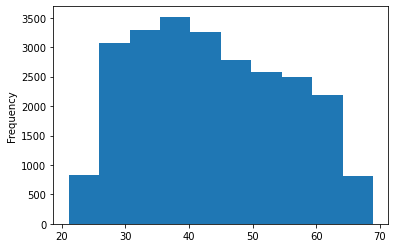

In [ ]:
train['YEARS_BIRTH'].plot.hist()

In [ ]:
import numpy as np
train['DAYS_EMPLOYED']=train['DAYS_EMPLOYED'].replace(365243,np.NaN)

In [ ]:
train['DAYS_EMPLOYED'].isna().sum()

4167

In [ ]:
train['YEARS_EMPLOYED']=(-train['DAYS_EMPLOYED'])/365

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24823 entries, 0 to 26456
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          24823 non-null  object 
 1   car             24823 non-null  object 
 2   reality         24823 non-null  object 
 3   child_num       24823 non-null  int64  
 4   income_total    24823 non-null  float64
 5   income_type     24823 non-null  object 
 6   edu_type        24823 non-null  object 
 7   family_type     24823 non-null  object 
 8   house_type      24823 non-null  object 
 9   DAYS_BIRTH      24823 non-null  int64  
 10  DAYS_EMPLOYED   20656 non-null  float64
 11  work_phone      24823 non-null  int64  
 12  phone           24823 non-null  int64  
 13  email           24823 non-null  int64  
 14  occyp_type      17210 non-null  object 
 15  family_size     24823 non-null  float64
 16  begin_month     24823 non-null  float64
 17  credit          24823 non-null 

# 파생변수 만들기

In [ ]:
train=train.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','child_num','family_size'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24823 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          24823 non-null  object 
 1   car             24823 non-null  object 
 2   reality         24823 non-null  object 
 3   income_total    24823 non-null  float64
 4   income_type     24823 non-null  object 
 5   edu_type        24823 non-null  object 
 6   family_type     24823 non-null  object 
 7   house_type      24823 non-null  object 
 8   work_phone      24823 non-null  int64  
 9   phone           24823 non-null  int64  
 10  email           24823 non-null  int64  
 11  occyp_type      17210 non-null  object 
 12  begin_month     24823 non-null  float64
 13  credit          24823 non-null  float64
 14  family_num      24823 non-null  float64
 15  YEARS_BIRTH     24823 non-null  float64
 16  YEARS_EMPLOYED  20656 non-null  float64
 17  is_child        24823 non-null 

In [ ]:
train_categorical=train[['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type']]

In [ ]:
train_categorical=pd.get_dummies(train_categorical)

In [ ]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24823 entries, 0 to 26456
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   gender_F                                24823 non-null  uint8
 1   gender_M                                24823 non-null  uint8
 2   car_N                                   24823 non-null  uint8
 3   car_Y                                   24823 non-null  uint8
 4   reality_N                               24823 non-null  uint8
 5   reality_Y                               24823 non-null  uint8
 6   income_type_Commercial associate        24823 non-null  uint8
 7   income_type_Pensioner                   24823 non-null  uint8
 8   income_type_State servant               24823 non-null  uint8
 9   income_type_Student                     24823 non-null  uint8
 10  income_type_Working                     24823 non-null  uint8
 11  edu_type_Academ

In [ ]:
train_categorical=train_categorical.drop(columns=['gender_F','car_N','reality_N','income_type_Commercial associate','edu_type_Academic degree','family_type_Civil marriage','house_type_Co-op apartment'])

In [ ]:
train=pd.concat([train,train_categorical],axis=1)

In [ ]:
train=train.drop(columns=['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24823 entries, 0 to 26456
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   income_total                            24823 non-null  float64
 1   work_phone                              24823 non-null  int64  
 2   phone                                   24823 non-null  int64  
 3   email                                   24823 non-null  int64  
 4   begin_month                             24823 non-null  float64
 5   credit                                  24823 non-null  float64
 6   family_num                              24823 non-null  float64
 7   YEARS_BIRTH                             24823 non-null  float64
 8   YEARS_EMPLOYED                          20656 non-null  float64
 9   is_child                                24823 non-null  int64  
 10  gender_M                                24823 non-null  ui

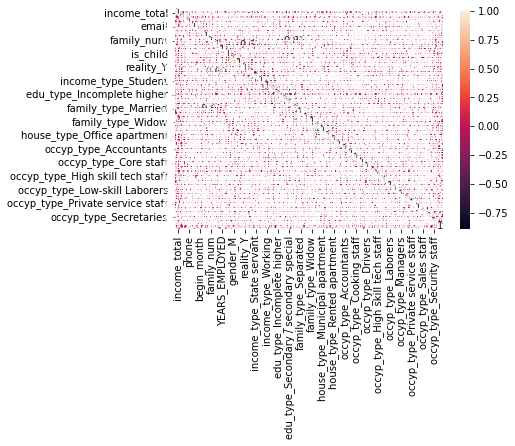

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.figsize=(15,15)
sns.heatmap(train.corr(),annot=True)

In [ ]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)

filled_train=imputer.fit_transform(train)
train['YEARS_EMPLOYED']=pd.DataFrame(filled_train,columns=train.columns)

ValueError: ignored

In [ ]:
train[train['DAYS_EMPLOYED']>0 and train['occyp_type'].isna()]

In [ ]:
train[train['YEARS_EMPLOYED']>0]['YEARS_EMPLOYED'].plot.hist()

* PCA
* 미고용자 변수 추가